# Testing HotVis on the wiki paths

In [1]:
import csv
from HotVisFunctions import *
from SGDStressFunctions import *
import pandas as pd
import numpy as np
import torch_geometric

/opt/conda/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
#paths = pd.read_csv("graphs/Wikipedia/paths_finished.ngram")
#random_rows = paths.sample(n = 1000)
#random_rows.to_csv("graphs/Wikipedia/paths_finished_shortened.ngram", index=False)

In [7]:
def from_ngram(file: str, sep: str = ",") -> pp.PathData:
    with open(file, "r", encoding="utf-8") as f:
        paths = [line.strip().split(sep) for line in f if len(line.strip().split(sep)) > 1]
    
    weights = [1.0] * len(paths)

    mapping = pp.IndexMap()
    mapping.add_ids(np.unique(np.concatenate([np.array(path) for path in paths])))

    pathdata = pp.PathData(mapping)
    pathdata.append_walks(node_seqs=paths, weights=weights)

    return pathdata

In [8]:
# load wiki
wiki = from_ngram("graphs/Wikipedia/paths_asteroid_viking.ngram", sep=";")
print(wiki.get_walk(1))


('Asteroid', 'Trojan_War', 'Bronze_Age', 'Stonehenge', 'Norfolk', 'Viking')


In [9]:
print(wiki.mapping)

10th_century -> 0
11th_century -> 1
12th_century -> 2
13th_century -> 3
14th_century -> 4
15th_century -> 5
16th_century -> 6
17th_century -> 7
18th_century -> 8
19th_century -> 9
1_Ceres -> 10
1st_century -> 11
1st_century_BC -> 12
20th_century -> 13
2nd_century -> 14
3_Juno -> 15
3rd_century -> 16
4_Vesta -> 17
4th_century -> 18
5th_century -> 19
6th_century -> 20
7th_century -> 21
8th_century -> 22
9th_century -> 23
< -> 24
Actor -> 25
Afghanistan -> 26
Africa -> 27
Agriculture -> 28
Aircraft_carrier -> 29
Alchemy -> 30
Alexander_the_Great -> 31
Alfred_the_Great -> 32
American_football -> 33
Amsterdam -> 34
Ancient_Greece -> 35
Ancient_Rome -> 36
Ancient_history -> 37
Animal -> 38
Animation -> 39
Anno_Domini -> 40
Antarctica -> 41
Anthropology -> 42
Apollo_11 -> 43
Archaeoastronomy -> 44
Archaeology -> 45
Arctic -> 46
Arctic_Circle -> 47
Arctic_Ocean -> 48
Armenia -> 49
Art -> 50
Asia -> 51
Assyria -> 52
Asteroid -> 53
Astrology -> 54
Astronomy -> 55
Athena -> 56
Athens -> 57
Atlant

In [10]:
layout_2 = HotVis(wiki, 2, 5000, 3, alpha= torch.tensor([1, 0.5]), force=10)
layout_3 =  HotVis(wiki, 3, 5000, 3, alpha= torch.tensor([1, 0.5, 0.3]), force=10)
layout_5 =  HotVis(wiki, 5, 5000, 3, alpha= torch.tensor([1, 0.5, 0.3, 0.25, 0.2]), force=10)

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(ho_graph.data.edge_index, device=device, dtype=torch.long)
/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_sequence = torch.tensor(ho_graph.data.node_sequence, device=device, dtype=torch.long)
100%|██████████| 5000/5000 [00:12<00:00, 415.31it/s]


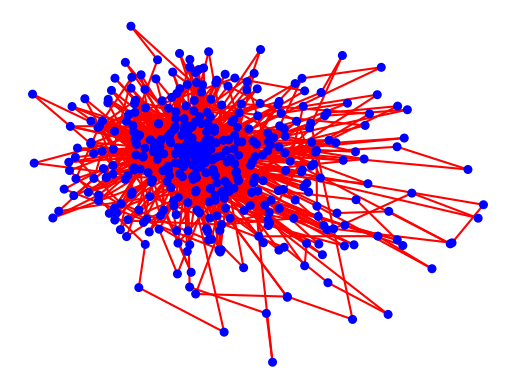

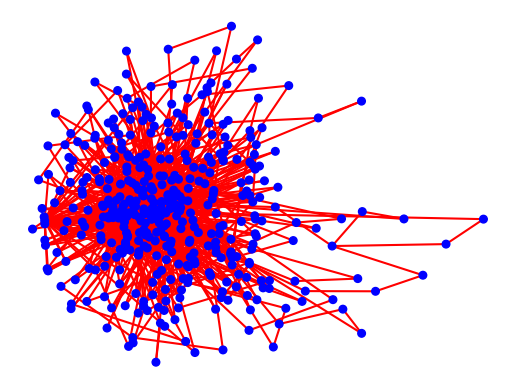

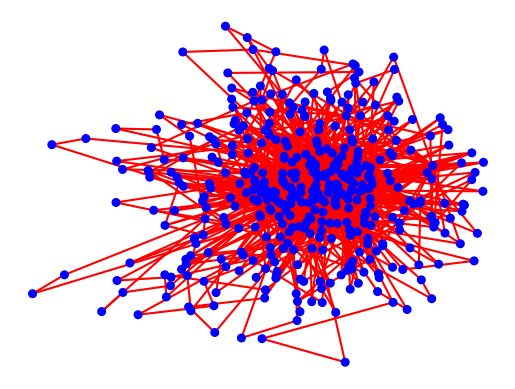

In [11]:
graph = pp.MultiOrderModel.from_PathData(wiki, max_order=1).layers[1]
pp.plot(graph, layout=layout_2, backend='matplotlib')
pp.plot(graph, layout=layout_3, backend='matplotlib')
pp.plot(graph, layout=layout_5, backend='matplotlib')

In [12]:
print(edge_crossing(wiki, layout_2))
print(edge_crossing(wiki, layout_3))
print(edge_crossing(wiki, layout_5))

tensor(121721.)
tensor(133520.)
tensor(135653.)


In [13]:
print(causal_path_dispersion(wiki, layout_2, 3))
print(causal_path_dispersion(wiki, layout_3, 3))
print(causal_path_dispersion(wiki, layout_5, 3))

tensor(0.4829, dtype=torch.float64)
tensor(0.4932, dtype=torch.float64)
tensor(0.5575, dtype=torch.float64)


In [14]:
print(closeness_eccentricity(wiki, layout_2, 3, 0.1))
print(closeness_eccentricity(wiki, layout_3, 3, 0.1))
print(closeness_eccentricity(wiki, layout_5, 3, 0.1))

/workspaces/pathpyG/src/pathpyG/visualisations/Project_JS/HotVisFunctions.py:215: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  path_indices = torch.tensor(paths.mapping.to_idxs(path), device=device)


tensor(0.3737, dtype=torch.float64)
tensor(0.3713, dtype=torch.float64)
tensor(0.3931, dtype=torch.float64)
